<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


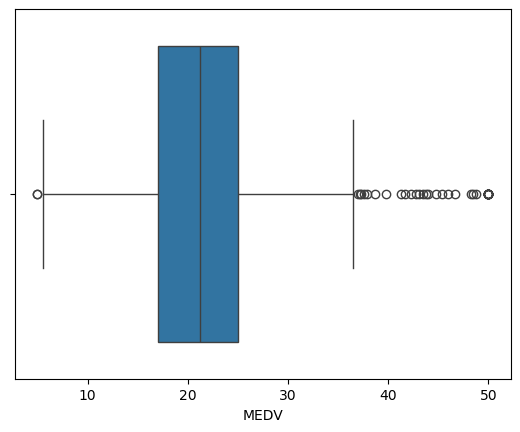

In [6]:
# Diagrama de caja Valor medio de las viviendas ocupadas por sus propietarios"

ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.show()

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

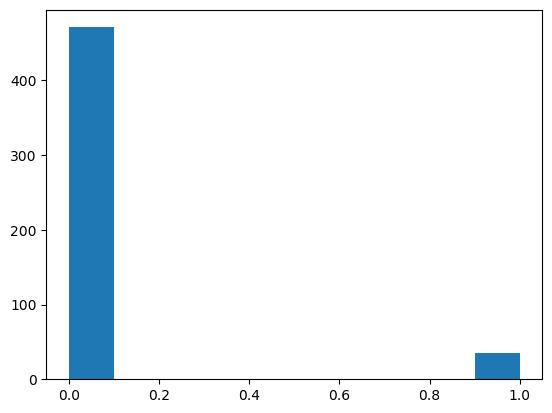

In [7]:
# mostramos la proporcion de viviendas que que colindan con el rio Charles, 0 no colindan 1 si colinda
pyplot.hist(boston_df['CHAS'])

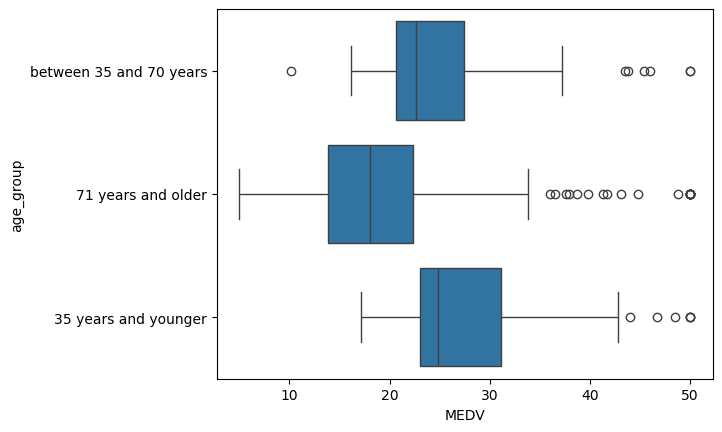

In [8]:
# Relacion entre las viviendas ocupadas por sus propietarios contra las que fueron construidas en 35, 7 y mas de 70 años

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 71), 'age_group'] = '71 years and older'

# Diagrama de caja Valor medio de las viviendas ocupadas por sus propietarios contra la edad de las mismas"

ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
pyplot.show()

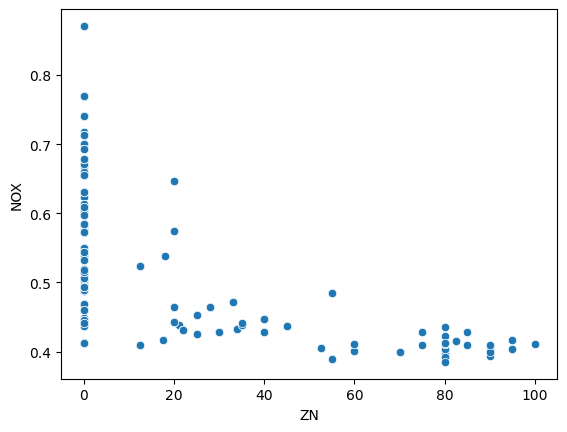

In [9]:
# Diagrama de disperson para  mostrar que relación hay entre las concentraciones de óxido nítrico y 
#la proporción de acres comerciales no minoristas por ciudad

ax = sns.scatterplot(x='ZN', y='NOX', data=boston_df)
pyplot.show()

## LO QUE NOS MUESTRA QUE LA MAYORIA DE LA CONCENTRACION DE OXIDO NÍTRICO SE ENCUENTRA FUERA DE LA ZONA RESIDENCIAL

In [10]:
# Prueba t para determinar si existe una diferencia significativa, en valo medio de las casa que se encuentran
# colindan con el rio Charles 

## X is the input variables (or independent variables)
X = boston_df['CHAS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# La prueba T nos al ser mayor que .5 nos indica que si existe una diferencia siginificatva estadiscamente de que el valor medio de las
#casas que se encuentra cerca del rio Charles son diferentes al del las casa que no lo estan

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           7.39e-05
Time:                        06:29:58   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Determinar si hay alguna diferencia en los valores medios de las casas para cada proporción de 
# unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)?

boston_df.loc[(boston_df['AGE'] < 1940), 'age_group'] = 'construido antes de 1940 '
boston_df.loc[(boston_df['AGE'] >= 1940), 'age_group'] = 'construido despues de 1940'

from statsmodels.formula.api import ols
lm = ols('age_group ~ MEDV', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

# El valor pe es superior al .5 lo que significa que los aceptamos la hipotesisi nula que los grupos son iguales 

             df        sum_sq       mean_sq          F        PR(>F)
MEDV        1.0  1.165496e-29  1.165496e-29  25.897375  5.090994e-07
Residual  504.0  2.268222e-28  4.500440e-31        NaN           NaN


In [15]:
### Correlacion que existe existe relación entre las concentraciones de óxido nítrico
# y la proporción de acres comerciales no minoristas por ciudad


## X is the input variables (or independent variables)
X = boston_df['ZN']
## y is the target/dependent variable
y = boston_df['NOX']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# el resultado de r al cuadrado, nos arroja una correlacion del 51%, lo que concluimos que son altamente relasionables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     183.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           7.23e-36
Time:                        06:55:19   Log-Likelihood:                 451.60
No. Observations:                 506   AIC:                            -899.2
Df Residuals:                     504   BIC:                            -890.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5839      0.005    118.858      0.000       0.574       0.594
ZN            -0.0026      0.000    -13.545      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       47.092   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.701
Skew:                           0.804   Prob(JB):                     2.95e-13
Kurtosis:                       3.392   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#  impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas 
# ocupadas por sus propietarios

from statsmodels.formula.api import ols
lm = ols('DIS ~ MEDV', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df       sum_sq     mean_sq         F        PR(>F)
MEDV        1.0   139.868826  139.868826  33.57957  1.206612e-08
Residual  504.0  2099.308819    4.165295       NaN           NaN
